# I. **Initial Set Up**

## **Project on Evaluating Machine Learning Models.**
 
**Instructions.** Select a dataset from [UCI](https://archive.ics.uci.edu/ml/datasets.php) or [Google](https://datasetsearch.research.google.com/), formulate a machine learning problem (supervised or unsupervised), and build and evaluate two models (different methods) that solve the problem. Any programming language may be used. 
- You may also use other legitimate sources at the same level of the UCI and Google sites provided. 
- You may use methods not taught in class. KNN is not an option. 
- You may also use a portion of the dataset if its size causes problems (e.g. reduce the number of rows)

**Deliverables.** In a Google Drive folder that I can access, submit the following: 
- Source code and executables
- Instructions on how to use your resources (i.e. your program)
- Slide deck explaining your work
- Recorded video presentation of your work (approx 20-30mins)

**Expected Output.**
- Jupyter Notebook (.ipynb)
- Resources (csv unclean and cleaned)
- Video Presentation
- Slide Deck Presentation

# **II. Data Set**

**Dataset Overview.**

The dataset contains raw information sourced from the Zomato Recommendation Platform for restaurants based in Pune, India, covering the year 2023. Each row corresponds to a single restaurant entry and includes a variety of attributes such as the restaurant’s name, multiple types of cuisine offered (up to eight slots), its categorized food type, the average cost for two people, the locality within Pune, and the average customer dining rating.

This dataset provides a foundation for predictive modeling and exploratory analysis, as it blends both categorical (e.g., cuisine types, locality) and numerical (e.g., rating, pricing) data. Through this structure, we can investigate patterns in consumer preferences, identify key factors influencing restaurant ratings, and evaluate the performance of machine learning models like Decision Trees and Mixed Naive Bayes in classifying highly rated restaurants.

| **Features**              | **Short Explanation**                                                         | **Possible Values / Example**                 |
| ------------------------ | ----------------------------------------------------------------------------- | --------------------------------------------- |
| `Restaurant_Name`        | Name of the restaurant listed on Zomato                                       | `"Le Plaisir"`, `"Savya Rasa"`                |
| `Cuisine1` to `Cuisine8` | Different types of cuisines offered by the restaurant, in order of prominence | `"South Indian"`, `"Desserts"`, `"MISSING"`   |
| `Category`               | Grouped categories combining all cuisine types into a readable list           | `"Cafe, Italian, Continental..."`             |
| `Pricing_for_2`          | Approximate cost for two people, in INR                                       | `600`, `1200`, `2100`                         |
| `Locality in Pune`       | Location/neighborhood of the restaurant in Pune                               | `"Koregaon Park"`, `"Baner"`, `"Viman Nagar"` |
| `Dining_Rating`          | Average customer rating of the restaurant (out of 5)                          | `4.2`, `3.8`, `4.9`                           |


# **III. Ideal Pipeline**

Our goal for this analysis is to be able to determine which model is able to more accurately predict what are the top restaurants in the locale (possibly depending on cuisines, locality, or average price.) <!-- Expound >

**1. Data Preprocessing**
- Load and Inspection of data.
- Cleaning the data (i.e. Tableau) <!-- care of Godwyn -->

**2. Exploratory Data Analysis (EDA)**
- This will be more on understanding which features create a reactive effect towards the rest of the feature. 
- Identifies which feature is able to change the course of the data. From there, we will implement the models.

**3. Decision Tree Implementation 1 (DT1)**
- This will be one of the initial basis of our model apart from EDA.

**4. Apply Decision Tree Implementation 2 (DT2)**
- The second implementation of Decision Tree will consist of the data set where we have omitted certain features (To be identified soon. _i.e., MISSING values, certain irrelevant features_) based on our domain knowledge.
- Comparing this to Decision Tree Implementation 1, we may be able to justify that omitting certain "junk" features can make Decision Tree model more accurate.

**5. Apply Mixed Naive Bayes (MNB)**
- The final model we use in this study is the Mixed Naive Bayes (MNB) classifier. This model is a variation of the standard Naive Bayes algorithm that allows us to handle both categorical and continuous features—whic makes it especially well-suited for real-world datasets like Zomato’s, where variables such as cuisine type (categorical) and average price (numerical) coexist.

**6. Conclusion**
- Generally, through ***Exploratory Data Analysis (EDA) and both Decision Tree implementations***, you may conclude that certain features—such as Cuisine type, Locality, or Average Price—have a strong influence on whether a restaurant receives high ratings. _Features like 'MISSING' or non-informative columns could be confirmed as noise, negatively affecting model accuracy._
- Comparing ***Decision Tree 1 (all features) with Decision Tree 2 (cleaned features)***, you might find that:
    - Removing irrelevant or noisy features leads to higher accuracy and simpler tree structures.
    - This supports the idea that domain knowledge-based feature pruning improves model performance.
- ***Mixed Naive Bayes (MNB) might perform competitively or better on some metrics*** (like precision or recall) compared to Decision Trees, especially in cases where feature independence is mostly true. However, MNB might underperform if features are highly correlated, where Decision Trees can better handle interactions.

# **IV. Data Preprocessing**

< This section will include general importing and inspection of the data. Cleaning the data as well for nullified or duplicated values. > <!-- Expound more >

In [26]:
## Assume that we do not have the necessary libraries installed. 
%pip install pandas numpy matplotlib seaborn scikit-learn mixed-naive-bayes #This is to install the libraries needed to run the code.
%pip install --upgrade pip #Updates pip

# Need to install tkinter.
# For mac: brew install python-tk

import pandas as pd
import numpy as np
# import tkinter as tk
# from tkinter import filedialog

import math

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold ## https://www.geeksforgeeks.org/cross-validation-machine-learning/
from mixed_naive_bayes import MixedNB

## Use if you are using Google Drive
import io

## Use if you are using Google Colab
# from google.colab import files
# uploaded = files.upload()

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#This': Expected package name at the start of dependency specifier
    #This
    ^


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#Updates': Expected package name at the start of dependency specifier
    #Updates
    ^


In [27]:
## If using Jupyter Notebook / Run Locally via VS Code. Import the file LOZADA, BINWAG, CSCI 211 Zomato Dataset Pune.csv
# Hardcoded file path to your dataset
file_path = "LOZADA, BINWAG, CSCI 211 Zomato Dataset Pune.csv"
zomato_pune = pd.read_csv(file_path)

# Create a working copy for analysis
zomato_for_eda = zomato_pune.copy()

# Display the data
zomato_for_eda.head()

,Restaurant_Name,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8,Category,Pricing_for_2,Locality in Pune,Dining_Rating
0,Santè Spa Cuisine,European,Healthy Food,Mediterranean,MISSING,MISSING,MISSING,MISSING,MISSING,"Continental, Healthy Food, Mediterranean",1200,Koregaon Park,4.9
1,Le Plaisir,Coffee and Tea,European,European,Healthy Food,Sandwich,Other Indian,Beverages,MISSING,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,Deccan Gymkhana,4.9
2,Gong,East Asian,East Asian,Asian (unspecified),Himalayan,Beverages,MISSING,MISSING,MISSING,"Chinese, Sushi, Asian, Momos, Beverages",1700,Baner,4.9
3,The French Window Patisserie,Coffee and Tea,Desserts,European,Bakery,European,MISSING,MISSING,MISSING,"Cafe, Desserts, French, Bakery, European",600,Koregaon Park,4.9
4,Savya Rasa,South Indian,South Indian,South Indian,South Indian,Beverages,MISSING,MISSING,MISSING,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,Koregaon Park,4.9


## **Restaurant Count per Locality**

C:\Users\Uwie\AppData\Local\Temp\ipykernel_12076\1320282737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locality_counts.head(15).values, y=locality_counts.head(15).index, palette="viridis")


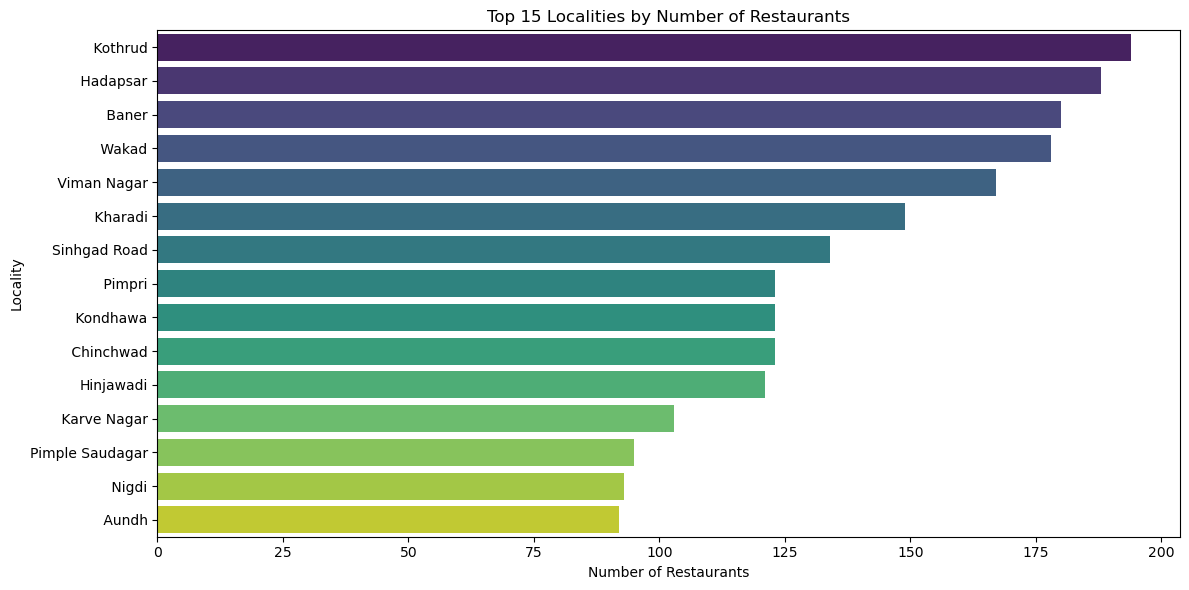

In [28]:
# Count restaurants per locality
locality_counts = zomato_for_eda['Locality in Pune'].value_counts()

# Plot the top 15
plt.figure(figsize=(12, 6))
sns.barplot(x=locality_counts.head(15).values, y=locality_counts.head(15).index, palette="viridis")

plt.title("Top 15 Localities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()

## **Listing All Cuisines**

In [29]:
# List of cuisine columns
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]

# Flatten, drop NAs and "MISSING", then get unique values
all_cuisines = pd.unique(
    zomato_for_eda[cuisine_cols]
    .values
    .ravel()
)

# Clean list
unique_cuisines = sorted([c for c in all_cuisines if pd.notna(c) and c != 'MISSING'])

# Display
print("Number of unique cuisines:", len(unique_cuisines))
print(unique_cuisines)


Number of unique cuisines: 46
['Asian', 'Asian (unspecified)', 'BBQ', 'Bakery', 'Bar Food', 'Beverages', 'Burger', 'Chinese', 'Coffee', 'Coffee and Tea', 'Desserts', 'East Asian', 'European', 'Fast Food', 'Finger Food', 'Healthy Food', 'Himalayan', 'Ice Cream', 'Indian (other)', 'Juices', 'Kebab', 'Korean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'North Eastern', 'North Indian', 'Oriental', 'Other Indian', 'Paan', 'Pasta', 'Pizza', 'Quick eats', 'Rajasthani', 'Raw Meats', 'Roast Chicken', 'Rolls', 'Sandwich', 'Seafood', 'South Indian', 'Southeast Asian', 'Steak', 'Street Food', 'Tea', 'The Americas', 'Wraps']


## **Correlation between Pricing_for_2 and Dining_Rating.**
This is to be able to understand if pricing is "cheaper" gains a better rating as a restaurant. However, this is just a shallow experiment as Pricing can't be the only factor in a high-rating. 

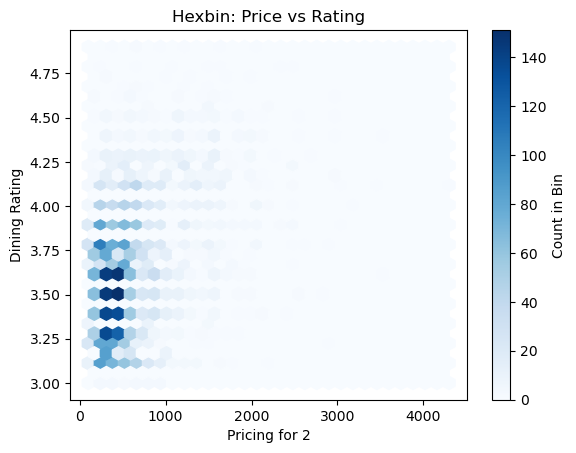

In [30]:
plt.hexbin(zomato_for_eda['Pricing_for_2'], zomato_for_eda['Dining_Rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.xlabel('Pricing for 2')
plt.ylabel('Dining Rating')
plt.title('Hexbin: Price vs Rating')
plt.show()

In [31]:
correlation = zomato_for_eda[['Pricing_for_2', 'Dining_Rating']].corr()
print("Correlation between Pricing and Rating:")
print(correlation)

Correlation between Pricing and Rating:
               Pricing_for_2  Dining_Rating
Pricing_for_2       1.000000       0.358431
Dining_Rating       0.358431       1.000000


## **Correlation between Locality and Cuisine (1-8) to Dining_Rating.**
We proceed to test if there is a correlation between a cuisine served in certain locality. Such that, if for instance, `Mediterranean` and `European` cuisines served in	`Koregaon Park` receives a high rating whilst `Coffee` and `Desserts` served in the same locale has low-ratings.

In [32]:
# Reshape cuisine columns into one
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]

# Melt cuisine columns
long_df = zomato_for_eda.melt(
    id_vars=['Dining_Rating', 'Locality in Pune'],
    value_vars=cuisine_cols,
    var_name='CuisineCol',
    value_name='Cuisine'
)

# Drop missing cuisines
long_df = long_df.dropna(subset=['Cuisine'])

# Grouping
rating_by_combo = (
    long_df
    .groupby(['Cuisine', 'Locality in Pune'])['Dining_Rating']
    .mean()
    .reset_index()
    .rename(columns={'Dining_Rating': 'Avg_Rating'})
)

# Top 15 highest-rated cuisine-location combos.
# Maintains the original index of the row.
rating_by_combo.sort_values('Avg_Rating', ascending=False).head(15)

# Revises the index starting from 0.
# Uncomment if prefer to use original indexing.
    # cleaned_top = rating_by_combo.sort_values('Avg_Rating', ascending=False).head(15).reset_index(drop=True)
    # cleaned_top # Prints



,Cuisine,Locality in Pune,Avg_Rating
301,Coffee and Tea,Deccan Gymkhana,4.90
699,Healthy Food,Deccan Gymkhana,4.90
1322,Other Indian,Deccan Gymkhana,4.90
738,Himalayan,Baner,4.90
975,Kebab,Senapati Bapat Road,4.80
1689,South Indian,Koregaon Park,4.76
687,Finger Food,Koregaon Park,4.70
290,Coffee,Kothrud,4.70
70,BBQ,Hinjawadi,4.70
1095,Mediterranean,Koregaon Park,4.60


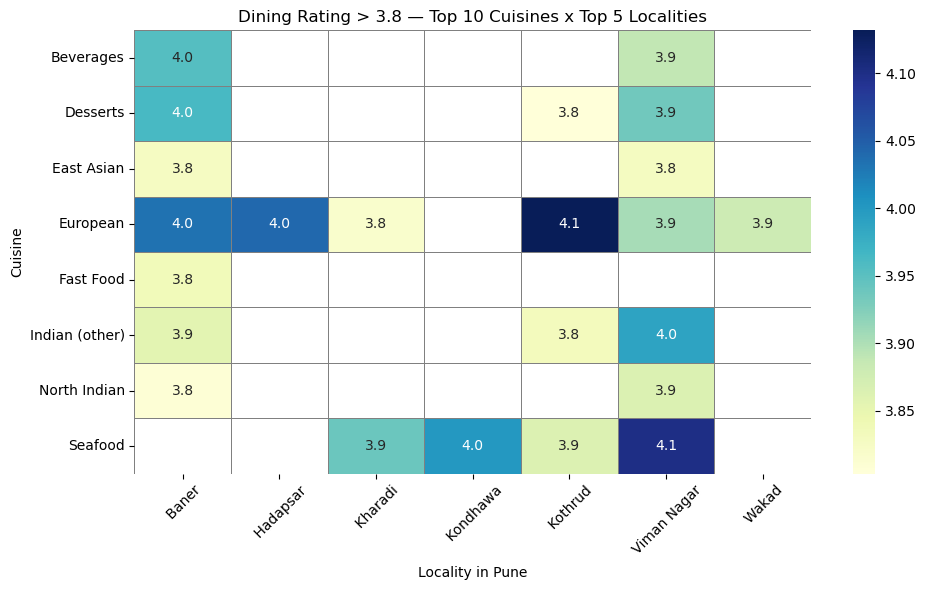

In [33]:
# Filter to threshold. Only Avg_Rating over 3.8
filtered = rating_by_combo[rating_by_combo['Avg_Rating'] > 3.8]

# Keep only top cuisines and localities by frequency
top_cuisines = (
    long_df['Cuisine'].value_counts()
    .loc[lambda x: x.index != 'MISSING']
    .head(10).index
)

top_localities = long_df['Locality in Pune'].value_counts().head(10).index

# Apply filter
filtered = filtered[
    (filtered['Cuisine'].isin(top_cuisines)) &
    (filtered['Locality in Pune'].isin(top_localities))
]

# Pivot
heatmap_data = filtered.pivot(
    index="Cuisine",
    columns="Locality in Pune",
    values="Avg_Rating"
)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Dining Rating > 3.8 — Top 10 Cuisines x Top 5 Localities")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **Price Frequency**

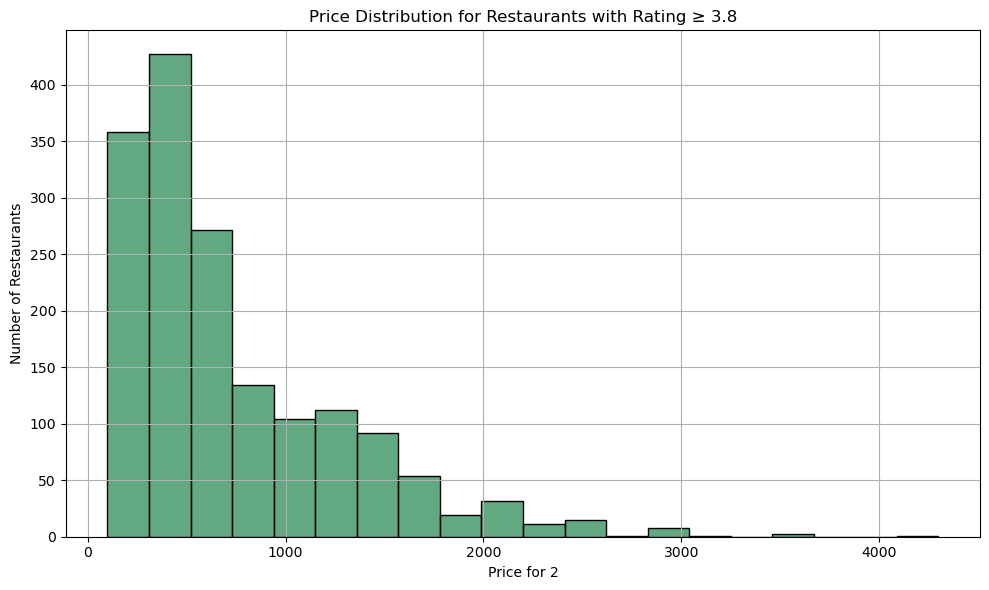

In [ ]:
plt.figure(figsize=(10, 6))

# Filter the dataset
filtered = zomato_for_eda[zomato_for_eda['Dining_Rating'] >= 3.8]

# Plot histogram
sns.histplot(filtered['Pricing_for_2'], bins=20, kde=False, color='seagreen', kde=true)
plt.title("Price Distribution for Restaurants with Rating ≥ 3.8")
plt.xlabel("Price for 2")
plt.ylabel("Number of Restaurants")
plt.grid(True)
plt.tight_layout()
plt.show()


## **Post-EDA**

After reviewing the data, we've understood the following.
- A
- B
- C 

# **V. Decision Tree Implementation 1**